# Libraries

In [3]:
import torch
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# MNIST 0-9 DATABASE

In [4]:
from torchvision.datasets import MNIST

In [5]:
(train_data, train_labels), (test_data, test_labels) = MNIST('./', train=True)

In [6]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
digitos_data = np.vstack([train_data, test_data]) #vertical stack
digitos_label = np.hstack([train_labels, test_labels])#horizontal stack

In [8]:
digitos_label

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [9]:
digitos_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

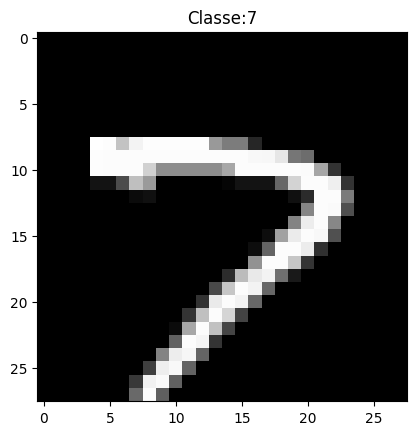

In [10]:
indice = np.random.randint(0, digitos_data.shape[0])
plt.imshow(digitos_data[indice], cmap='gray')
plt.title('Classe:' + str(digitos_label[indice]));

In [11]:
digitos_label

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

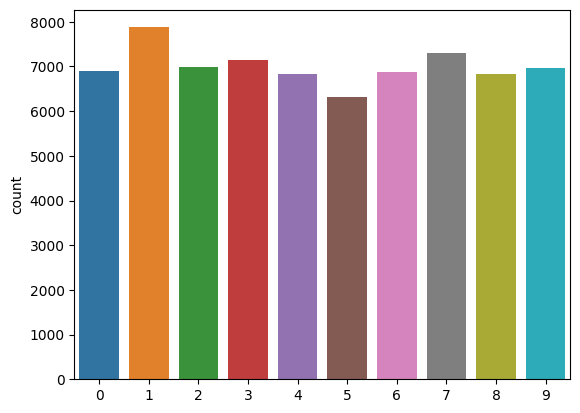

In [12]:
sns.countplot(x=digitos_label);

# Kaggle Dataset A-Z

In [14]:
!curl -o alfabeto_A-Z.zip https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  184M    0  579k    0     0   566k      0  0:05:33  0:00:01  0:05:32  566k
  0  184M    0 1731k    0     0   856k      0  0:03:40  0:00:02  0:03:38  856k
  1  184M    1 2883k    0     0   953k      0  0:03:18  0:00:03  0:03:15  953k
  2  184M    2 4044k    0     0  1005k      0  0:03:08  0:00:04  0:03:04 1005k
  2  184M    2 5196k    0     0  1034k      0  0:03:02  0:00:05  0:02:57 1039k
  3  184M    3 6348k    0     0  1054k      0  0:02:59  0:00:06  0:02:53 1154k
  3  184M    3 7500k    0     0  1068k      0  0:02:57  0:00:07  0:02:50 1153k
  4  184M    4 8652k    0     0  1078k      0  0:02:55  0:00:08  0:02:47 1153k
  5  184M    5 9788k    0     0  1085k      0  0:02

In [15]:
zip_object = zipfile.ZipFile(file='alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [16]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

In [17]:
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
alfabeto_data = dataset_az.drop('0', axis=1)

In [19]:
alfabeto_labels = dataset_az['0']
print(alfabeto_data.shape, alfabeto_labels.shape)

(372450, 784) (372450,)


In [20]:
alfabeto_data = np.reshape(alfabeto_data.values, (alfabeto_data.shape[0], 28, 28))

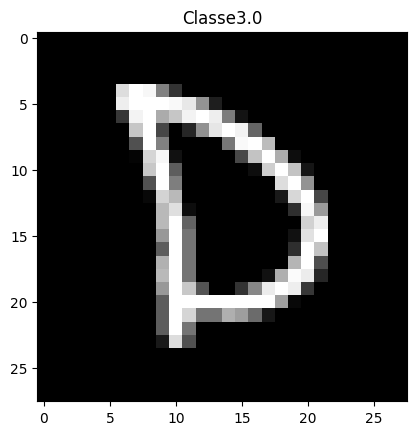

In [21]:
indice = np.random.randint(0, alfabeto_data.shape[0])
plt.imshow(alfabeto_data[indice], cmap='gray')
plt.title('Classe' + str(alfabeto_labels[indice]));

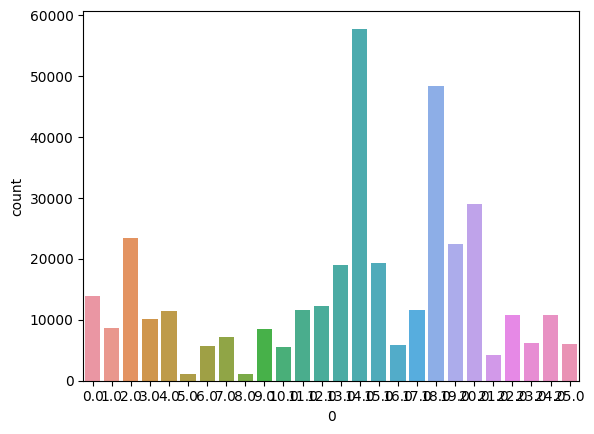

In [22]:
sns.countplot(x=alfabeto_labels);

# merging datasets

In [23]:
digitos_label, np.unique(digitos_label)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [24]:
alfabeto_labels, np.unique(alfabeto_labels)

(0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 372445    25.0
 372446    25.0
 372447    25.0
 372448    25.0
 372449    25.0
 Name: 0, Length: 372450, dtype: float32,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32))

In [25]:
alfabeto_labels += 10

In [26]:
alfabeto_labels, np.unique(alfabeto_labels)

(0         10.0
 1         10.0
 2         10.0
 3         10.0
 4         10.0
           ... 
 372445    35.0
 372446    35.0
 372447    35.0
 372448    35.0
 372449    35.0
 Name: 0, Length: 372450, dtype: float32,
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       dtype=float32))

In [27]:
data = np.vstack([alfabeto_data, digitos_data])
labels = np.hstack([alfabeto_labels, digitos_label])

In [28]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [29]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [30]:
data = np.array(data, dtype='float32')
data.shape

(442450, 28, 28)

In [31]:
data = np.expand_dims(data, axis=-1)
data.shape

(442450, 28, 28, 1)

# Preprocessing images

In [32]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [33]:
data /= 255.0 #normalize

#### onehot encoding

In [34]:
data[0].min(), data[0].max()

(0.0, 1.0)

In [35]:
le = LabelBinarizer()
labels = le.fit_transform(labels)
np.unique(labels)

array([0, 1])

In [36]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [37]:
total_class = labels.sum(axis=0)
total_class

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [38]:
total_class.max()

57825

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

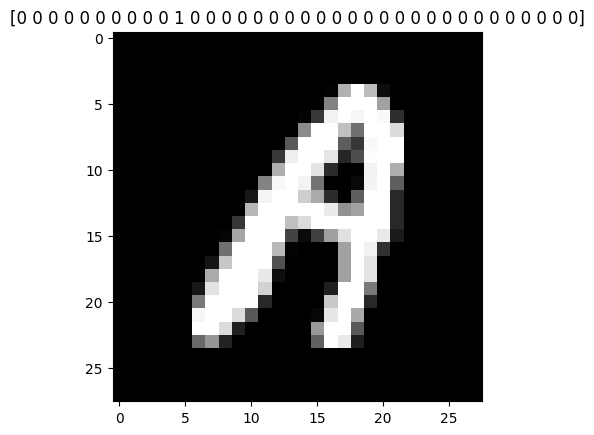

In [39]:
plt.imshow(data[0], cmap='gray')
plt.title(str(labels[0])) 

In [40]:
classes_peso = {}
for i in range(0, len(total_class)):
    classes_peso[i] = total_class.max()/total_class[i]


In [41]:
classes_peso

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=1)

In [43]:
X_train.shape, X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [44]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
augmentation = ImageDataGenerator(rotation_range=10,
                                  zoom_range=0.05,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=False
                                )

# Neural net creation

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [48]:
rede_neural = Sequential()
rede_neural.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
rede_neural.add(MaxPool2D(pool_size=(2,2)))
rede_neural.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))
rede_neural.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))
rede_neural.add(Flatten())
rede_neural.add(Dense(64, activation='relu'))
rede_neural.add(Dense(128, activation='relu'))
rede_neural.add(Dense(36, activation='softmax'))

rede_neural.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [50]:
nomes_labels = '0123456789'
nomes_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
nomes_labels = [l for l in nomes_labels]
print(nomes_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# train

In [51]:
import scipy

In [52]:
arquivo_modelo = 'manuscrito.model'
epochs = 100
batch_size = 32

In [53]:
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose=1, save_best_only=True)

In [55]:
import tensorflow as tf

# Check if GPU is available and enabled
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Check which GPU is being used
print("GPU Device Name:", tf.test.gpu_device_name())


GPU Available: []
GPU Device Name: 


In [54]:
history = rede_neural.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                                            validation_data = (X_test, y_test),
                                            steps_per_epoch = len(X_train) // batch_size,
                                            epochs = epochs,
                                            class_weight = classes_peso,
                                            verbose=1, callbacks=[checkpointer])

Epoch 1/100
11061/11061 [==============================] - ETA: 0s - loss: 1.7231 - accuracy: 0.8530
Epoch 1: val_loss improved from inf to 0.20211, saving model to manuscrito.model
INFO:tensorflow:Assets written to: manuscrito.model\assets


INFO:tensorflow:Assets written to: manuscrito.model\assets


11061/11061 [==============================] - 193s 17ms/step - loss: 1.7231 - accuracy: 0.8530 - val_loss: 0.2021 - val_accuracy: 0.9340
Epoch 2/100
11059/11061 [============================>.] - ETA: 0s - loss: 0.8834 - accuracy: 0.9108
Epoch 2: val_loss did not improve from 0.20211
11061/11061 [==============================] - 208s 19ms/step - loss: 0.8834 - accuracy: 0.9108 - val_loss: 0.2618 - val_accuracy: 0.8936
Epoch 3/100
11060/11061 [============================>.] - ETA: 0s - loss: 0.7669 - accuracy: 0.9200
Epoch 3: val_loss did not improve from 0.20211
11061/11061 [==============================] - 201s 18ms/step - loss: 0.7669 - accuracy: 0.9200 - val_loss: 0.3966 - val_accuracy: 0.8300
Epoch 4/100
11058/11061 [============================>.] - ETA: 0s - loss: 0.7077 - accuracy: 0.9241
Epoch 4: val_loss did not improve from 0.20211
11061/11061 [==============================] - 194s 18ms/step - loss: 0.7077 - accuracy: 0.9241 - val_loss: 0.3102 - val_accuracy: 0.8671
Epoc

KeyboardInterrupt: 

# Eval

In [ ]:
X_test.shape

In [ ]:
predict = rede_neural.predict(X_test, batch_size=batch_size)

In [ ]:
nomes_labels(np.argmax(predict[0]))

In [ ]:
np.argmax(y_test[0])

In [ ]:
rede_neural.evaluate(X_test, y_test)

In [ ]:
print(classification_report(y_test.argmax(axis=1), predict.argmax(axis=1), target_names=nomes_labels))

In [ ]:
history.history.keys()